In [ ]:
!nvidia-smi


Sat May  8 14:44:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.56       Driver Version: 461.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8    10W /  N/A |    153MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. Introduction
Nowadays, companies are increasingly aware of the importance of subscription services, and the churn rate is a critical indicator to track the health of a subscription-based company. To be more precise, the company can take measures in advance by predicting the customer churn rate to retain customers consistently. Therefore, this project goal is to make a churn prediction so that Telco can optimize products and services proactively.

# II. Data Description
The raw data contains 7043 rows (customers) and 21 columns (features).
* customer ID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

# III. Data Collection

 ### 1. Importing Modules

In [ ]:

import pandas as pd 
import seaborn as sns
#import missingno as mg 
from matplotlib import pyplot as plt
from sklearn import preprocessing 
import re
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
import researchpy as rp

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
from collections import Counter
sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from dtreeviz.trees import dtreeviz # remember to load the package
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics
import joblib
import xgboost
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy
import graphviz
import xgboost as xgb 
from xgboost import XGBClassifier

In [ ]:
# data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing

# plot
import seaborn as sns 
sns.set_style('whitegrid') 

import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D 
!pip install chart-studio
import chart_studio.plotly as py
from plotly import __version__

import graphviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset

In [ ]:
# loading dataset
df = pd.read_csv("Telco.csv")

### 3. About the Data
This dataset has 7,043 samples and 21 attributes(2 integer, 1 float, and 18 objects)
* Target Feature: Churn
* Numeric Features: Tenure, MonthlyCharges, and TotalCharges
* Categorical Features: CustomerID, Gender, SeniorCitizen, Partner, Dependents, PhoneService, MulitpleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* From the summary table below, we may infer that the feature TotalCharges has some **missing values**.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 4. Data Reshaping
* Rename the features 'tenure' and 'gender'
* Convert the feature 'TotalCharges' to numerical data type
* Converting the feature 'SeniorCitizen' to object data type

In [ ]:
# renaming 'tenure' and 'gender'
df = df.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

# converting 'TotalCharges' to numerical data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')

# converting 'SeniorCitizen' to object data type
df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# IV. Exploratory Data Analysis(EDA)

### 1. Target Variable
(1) Churn: Customer churn rate of Telco from this dataset is 27%, implying this is an ****imbalanced dataset****.

Text(0.5, 1.0, 'Churn vs Non Churn')

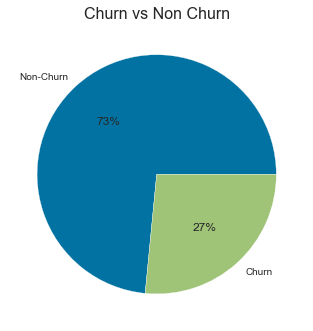

In [ ]:
# Pie chart of churn
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')  
ax.set_title('Churn vs Non Churn', fontsize=16)

### 2. Numeric Features
(1) Tenure: Customer with less tenure is more likely to churn.

(2) Monthly Charges: Customer with low monthly charges is less likely to churn; however, the churn trend between churn customers and non-churn customers gets similar as monthly charges go up.

(3) Total Charges: The distribution is similar for both churn customers and non-churn customers, implying that the feature Monthly Charges may not be a good predictor.

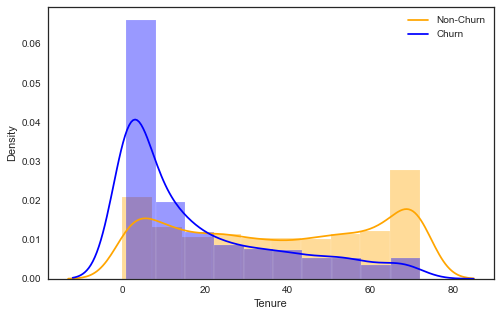

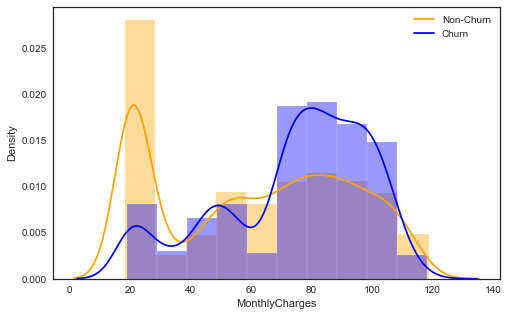

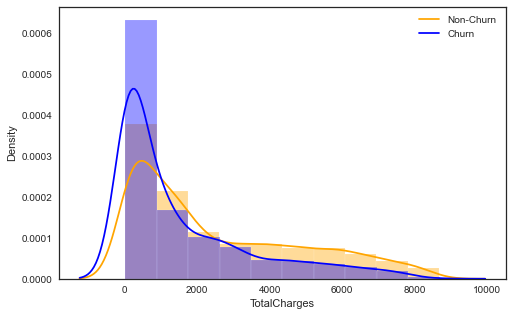

In [ ]:
# numerical features grouped by churn
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 'No'][col],
                 bins=10,
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(df[df.Churn == 'Yes'][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

(4) Outliers: The box plots show there is **no outliers** in this data set.

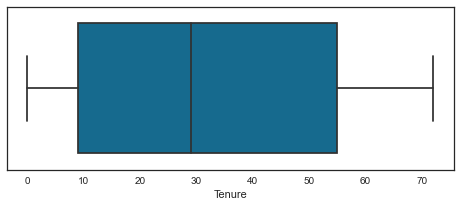

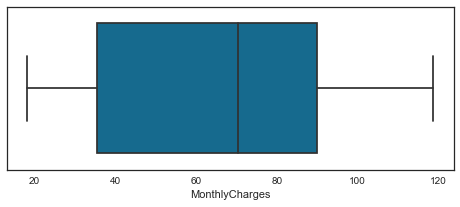

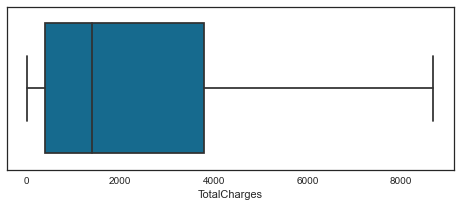

In [ ]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

(4) Skewness: The density plots show they are **not normal distributions**.

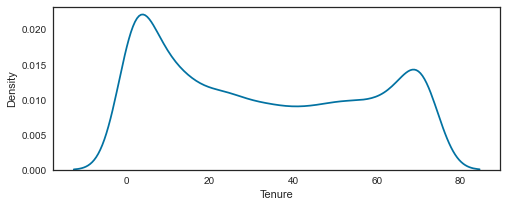

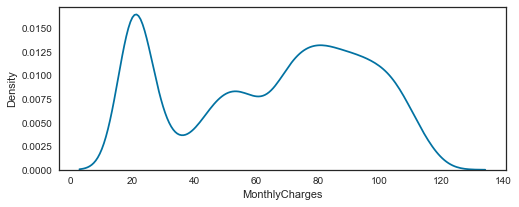

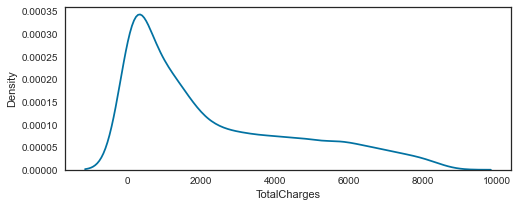

In [ ]:
# distribution
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.kdeplot(df[col])

(6) Correlation: The correlation matrix plot shows that these numeric features have a positive relationship.

<AxesSubplot:>

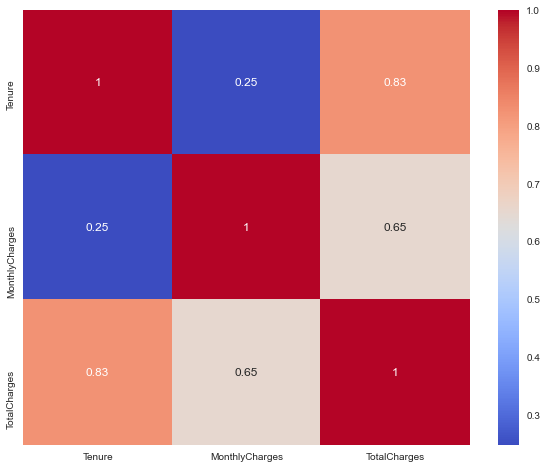

In [ ]:
# correlation between numerical features
plt.figure(figsize=(10, 8))
feature_corr = df.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

### 3. Categorical Features

(1) Gender: The churn rate is similar between male and female, indicating **Gender may not be a good predictor**.

(2) Senior Citizen: Customer who is senior citizen is more likely to churn.

(2) Partner: Customer who does not have partner is more likely to churn.

(3) Dependents: Customer who does have dependents is more likely to churn.

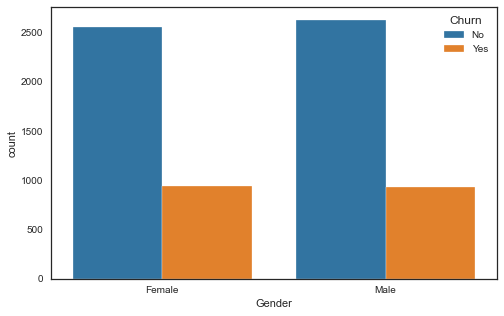

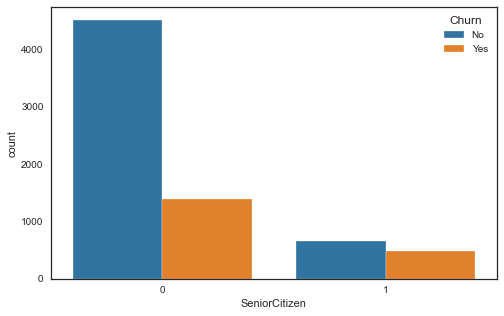

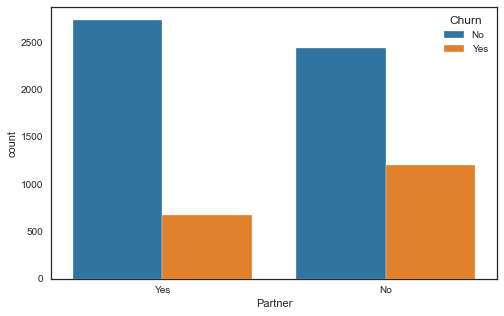

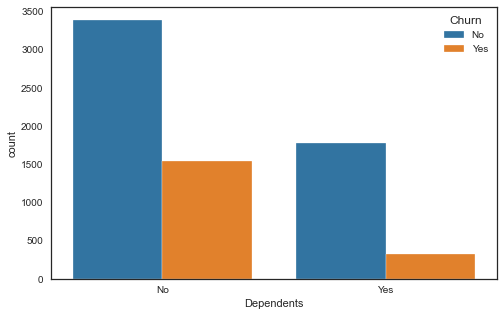

In [ ]:
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(4) Phone Service: PhoneService is a **redundant feature** since we can get the same information from teh feature Multiple Lines. So, we could drop this column.

(5) Multiple Lines: Customer who has multiple lines is slightly more likely to churn.

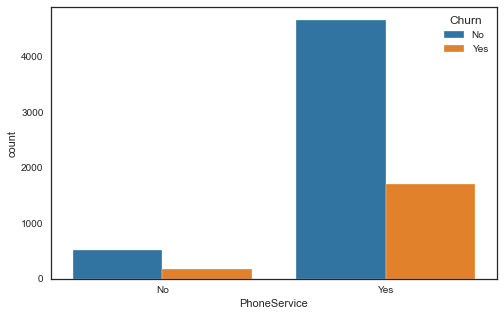

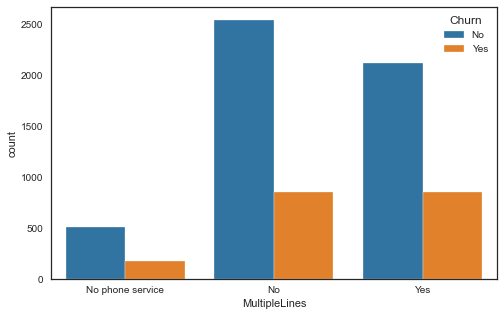

In [ ]:
for col in ['PhoneService', 'MultipleLines']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(6) Internet Service: If customer's Internet service provider is Fiber optic, then he/she is more likely to churn.

(7) Online Security: Customer who does not have online security is more likely to churn.

(8) Online Backup: Customer who does not have online backup is more likely to churn.

(9) Device Protection: Customer who does not have device protection is more likely to churn.

(10) Tech Support: Customer who does not have tech support is more likely to churn.

(11) Streaming TV / Streaming Movies: Streaming TV and Streaming Movies have no big effect on churn rate; however, if customer does not have internet service, then he/she is less likely to churn.

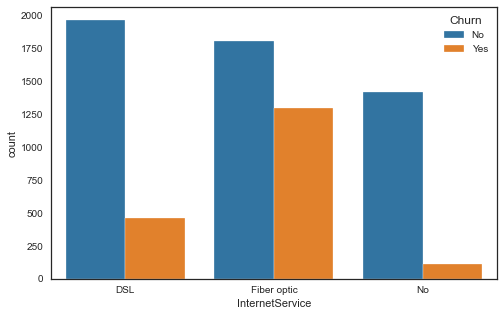

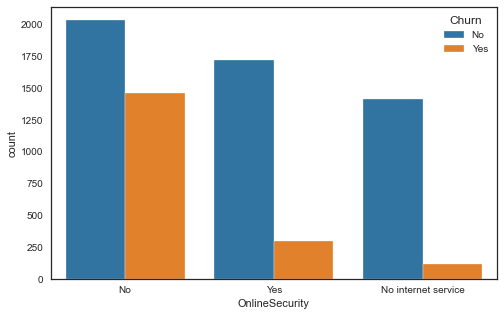

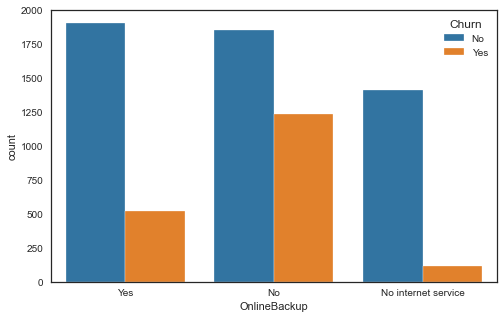

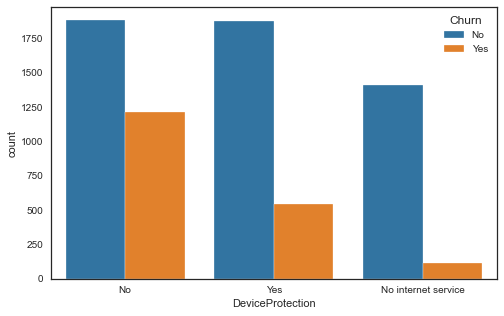

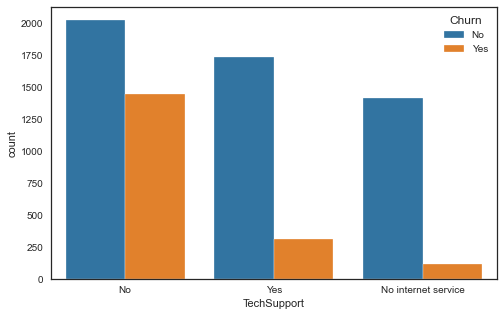

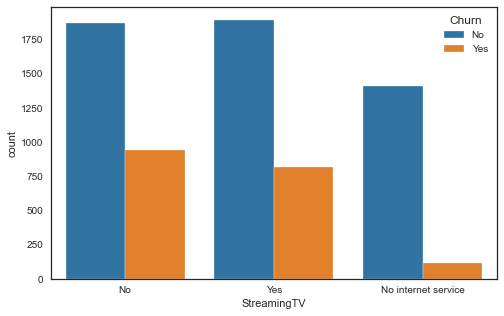

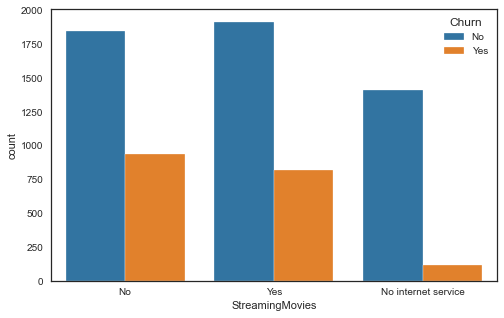

In [ ]:
for col in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV', 'StreamingMovies']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

(12) Paper less Billing: Customer who has paperless billing is more likely to churn.

(13) Payment Method: Customer who uses electronic check to pay bills is more likely to churn than those who using other payment methods.

(14) Contract: The churn rate goes down as the length of contract increases.

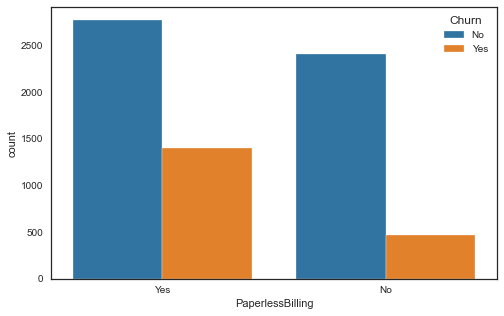

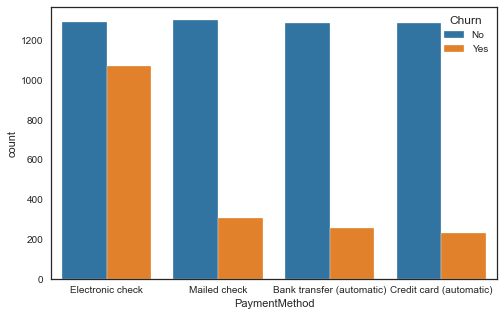

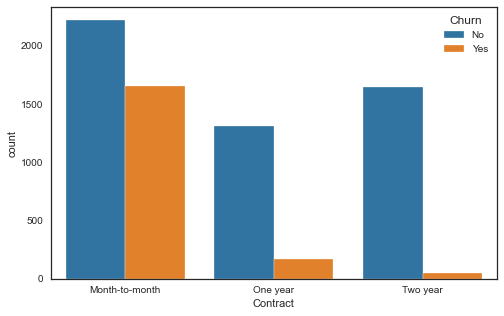

In [ ]:
for col in ['PaperlessBilling', 'PaymentMethod', 'Contract',]:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

# V. Data Preprocessing

### 1. Removing Duplicates
There is no repeated value in this data set.

In [ ]:
# summarize duplicates
sum(df.duplicated('customerID'))
#df2 = df.drop_duplicates('customerID')

0

### 2. Droping Unnecessary Columns

Remove the useless feature customerID.

In [ ]:
# remove customerID and PhoneService
df2 = df.drop(['customerID'], axis = 1)
df2.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


### 3. Categorical Data Encoding

Encode categorical variables, we use One-Hot Encoding for nominal variables and Label Encoding for ordinal variables.

* One-Hot Encoding: Gender, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Churn

* Label Encoding: Contract

In [ ]:
# Dummy Variables(One-Hot Encoding)
Gender = pd.get_dummies(df2['Gender'], prefix='Genger', drop_first=True)
Partner = pd.get_dummies(df2['Partner'], prefix='Partner', drop_first=True)
Dependents = pd.get_dummies(df2['Dependents'], prefix='Dependents', drop_first=True)
MultipleLines = pd.get_dummies(df2['MultipleLines'], prefix='MultipleLines', drop_first=True)
InternetService = pd.get_dummies(df2['InternetService'], prefix='InternetService', drop_first=True)
OnlineSecurity = pd.get_dummies(df2['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
OnlineBackup = pd.get_dummies(df2['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
DeviceProtection = pd.get_dummies(df2['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
TechSupport = pd.get_dummies(df2['TechSupport'], prefix='TechSupport', drop_first=True)
StreamingTV = pd.get_dummies(df2['StreamingTV'], prefix='StreamingTV', drop_first=True)
StreamingMovies = pd.get_dummies(df2['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
PaperlessBilling = pd.get_dummies(df2['PaperlessBilling'], prefix='PaperlessBilling', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
Churn = pd.get_dummies(df2['Churn'], prefix='Churn', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PhoneService'], prefix='PhoneService', drop_first=True)


df3 = pd.concat([df2, Gender, Partner, Dependents, MultipleLines, InternetService, 
                 OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
                 StreamingMovies, PaperlessBilling, PaymentMethod, Churn], axis=1)

In [ ]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['Contract']= label_encoder.fit_transform(df3['Contract']) 

In [ ]:
# drop original columns
list = ['Gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
'PaymentMethod', 'Churn', 'Contract', 'PhoneService']
df3.drop(df3[list], axis=1, inplace=True)
df3.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Genger_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_Yes,Churn_Yes
0,0,1,29.85,29.850000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,45,42.30,1840.750000,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


### 4. Splitting the Data into Training Set(70%) and Test Set(30%)
We split the data in 70:30 ratio so that 70% of the data will be used for training the model while 30% will be used for testing the model.

In [ ]:
X=df3.drop('Churn_Yes',axis=1)
y= df3['Churn_Yes']

In [ ]:
df3


,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Genger_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PhoneService_Yes,Churn_Yes
0,0,1,29.85,29.850000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,45,42.30,1840.750000,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.500000,1,1,1,0,1,0,...,1,0,1,0,1,0,1,1,1,0
7039,0,72,103.20,7362.899902,0,1,1,0,1,1,...,1,0,0,0,1,0,1,1,1,0
7040,0,11,29.60,346.450012,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7041,1,4,74.40,306.600006,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
df3.columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Genger_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PhoneService_Yes', 'Churn_Yes'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_df = pd.DataFrame(X,columns=X.columns)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.3,random_state=101)

In [ ]:
#check
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0]) 
    print(i.index)

RangeIndex(start=0, stop=4930, step=1)
RangeIndex(start=0, stop=2113, step=1)
RangeIndex(start=0, stop=4930, step=1)
RangeIndex(start=0, stop=2113, step=1)


### 5. Identifying Missing Values

For training set, the feature TotalCharges has **null/missing values**, so we can impute the missing values and replace them with average.

In [ ]:
#summarize missing values - X_train
X_train.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            9
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [ ]:
# fill missing value w/ mean 
X_train['TotalCharges'].fillna(value=X_train['TotalCharges'].mean(), inplace=True)
# check missing values
X_train.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [ ]:
#summarize missing values - y_train
y_train.isnull().sum()

0

In [ ]:
#summarize missing values - X_test
X_test.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            2
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [ ]:
# fill missing value w/ mean 
X_test['TotalCharges'].fillna(value=X_test['TotalCharges'].mean(), inplace=True)
# check missing values
X_test.isnull().sum()

SeniorCitizen                           0
Tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Genger_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes              

In [ ]:
#summarize missing values - y_test
y_test.isnull().sum()

0

In [ ]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4925    0
4926    0
4927    1
4928    1
4929    1
Name: Churn_Yes, Length: 4930, dtype: uint8

### 6. Identifying Outliers

The training data set does not have outliers.

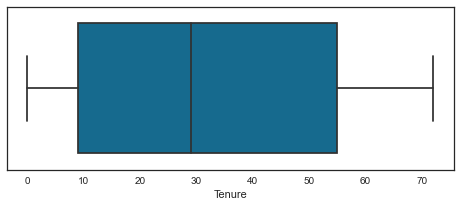

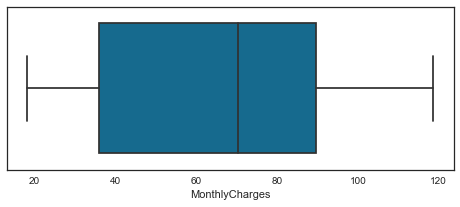

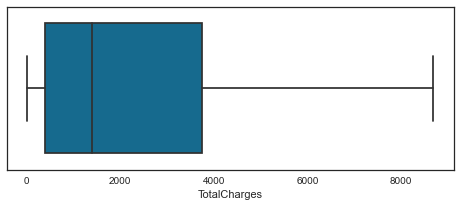

In [ ]:
# check outliers
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(X_train[col])

### 7. Feature Scaling - Standardization / Normalization

In [ ]:
## Standardization
#standard_scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_standard = standard_scaler.transform(X_train)
#X_test_standard = standard_scaler.transform(X_test)

#from sklearn.preprocessing import StandardScaler
#scaler_s = StandardScaler() 
#data_standard_scaled = scaler_s.fit_transform(data)

In [ ]:
# Normalization
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#scaler_m = MinMaxScaler() 
#data_normal_scaled = scaler_m.fit_transform(data)

# VI. Model Building & Evaluation

## 1. Logistic Regression 

Since this is an imbalanced dataset, we decide to use weighted logistic regression.

In [ ]:
# training 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs', class_weight='balanced')
lm.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [ ]:

# predicting
y_pred = lm.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1546
           1       0.53      0.75      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113



In [ ]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1170  376]
 [ 144  423]]


In [ ]:
# performance matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred),2)
f1_score = round(f1_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
y_prob_scores_test = lm.predict_proba(X_test)[:,1]
auc_score = round(roc_auc_score(y_test, y_prob_scores_test),2)

#logis
from astropy.table import Table
dict1 = [{'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall, 'auc_score': auc_score}]
logis_matrix = Table(rows=dict1)
print(logis_matrix)

accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.75     0.62      0.53   0.75      0.84


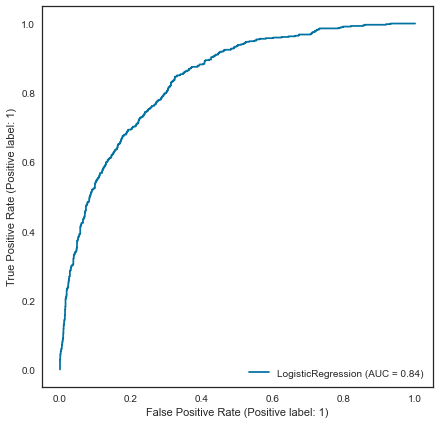

In [ ]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(lm, X_test, y_test, ax = ax)

## LOGISTIC REGRESSION

In [ ]:
train_accuracy = lm.score(X_train, y_train)
test_accuracy = lm.score(X_test, y_test)
print('Logistic Regression :', '-'*20, 
      'Logistic Regression Train Accurracy : {:.2f}'.format(train_accuracy), 
      'Logistic Regression Test Accurracy  : {:.2f}'.format(test_accuracy), sep='\n')

Logistic Regression :
--------------------
Logistic Regression Train Accurracy : 0.75
Logistic Regression Test Accurracy  : 0.75


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

LogisticRegression auc is  : 0.838 



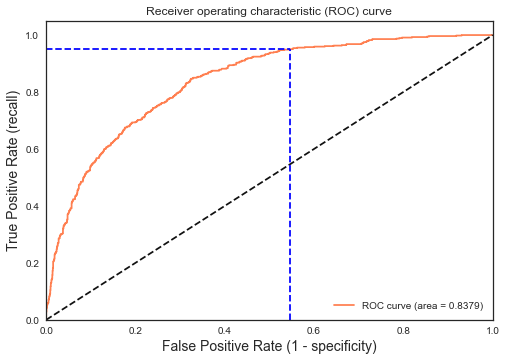

In [ ]:
y_pred_proba = lm.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print(lm.__class__.__name__+" auc is  : %2.3f \n" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.4f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#PRECISON(doğru diye tahmin ettiklerinin ne kadar doğru olduğu) RECALL(geçekte doğru olanların ne kadarını doğru bilmiş)a göre çiziliyor
#altında kalan alan büyükse 1 =1 ve 0 =0 ları dopru tahmin ediyor diyebiliriz.

In [ ]:


print(lm.get_params())

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### TRAIN RESULTS

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import sklearn


LOGISTIC REGRESSION :
Accuracy: 75.11
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3628
           1       0.52      0.78      0.62      1302

    accuracy                           0.75      4930
   macro avg       0.71      0.76      0.72      4930
weighted avg       0.80      0.75      0.76      4930

Confusion Matrix:


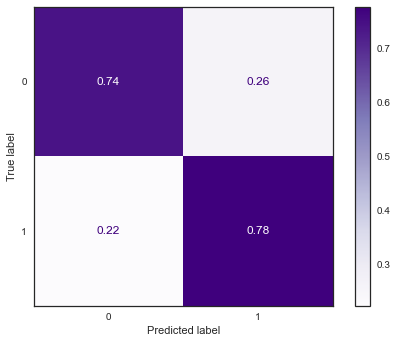

In [ ]:
print('\nLOGISTIC REGRESSION :')
predictions = lm.predict(X_train)
log_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(log_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(lm,X_train, y_train, cmap=plt.cm.Purples, normalize='true')
plt.show()

### TEST RESULTS

Accuracy: 75.39
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1546
           1       0.53      0.75      0.62       567

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.75      0.76      2113

Confusion Matrix:


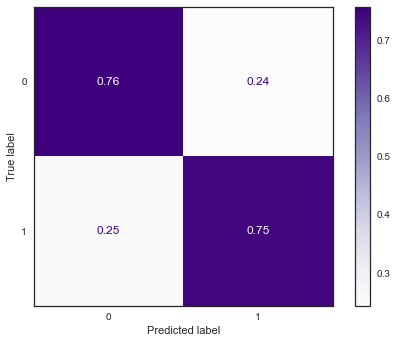

In [ ]:
predictions = lm.predict(X_test)
log_reg_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(log_reg_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(lm,X_test, y_test, cmap=plt.cm.Purples, normalize='true')
plt.show()

### Logistic Regression HyperParameter Tuning


In [ ]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1'],
               "solver" : ["liblinear"]
             }
#lasso liblinear
tuning= pd.DataFrame(columns=["C","Penalty","Score"])

grid_cv= GridSearchCV(estimator=LogisticRegression(),
    param_grid=parameters,
    cv=5
    )

grid_cv.fit(X_train, y_train)
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)
    
c= grid_cv.best_params_['C']
penalty=grid_cv.best_params_['penalty']
logic_score=grid_cv.best_score_
tuning=tuning.append({"C":c,"Penalty":penalty, "Score":logic_score},ignore_index=True)

display(tuning)

#GridSearch= önceden belirlenen parametrelerle modelin train sete daha uygun olmasını sağlıyor ve böylece best parametre seçilir.

Best Parameters :  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score      :  0.7981744421906694


,C,Penalty,Score
0,0.1,l1,0.798174


In [ ]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)   

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.793509,0.792239
1,0.010,0.800609,0.805963
2,0.100,0.800000,0.805017
3,1.000,0.800609,0.805017
4,10.000,0.799797,0.803124
5,100.000,0.799797,0.803124
6,1000.000,0.799797,0.803124


## Stochastic Gradient Descent (SGD)

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [ ]:
acc_sgd

75.6

In [ ]:
acc_sgd_test = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd_test

76.38

## 2. K Nearest Neighbors 

#### Data Transformation: Normalization (Min-Max Scalar) 

In [ ]:
# training and predicting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1546
           1       0.47      0.47      0.47       567

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [ ]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1250  296]
 [ 303  264]]


In [ ]:
# performance matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred),2)
f1_score = round(f1_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
y_prob_scores_test = knn.predict_proba(X_test)[:,1]
auc_score = round(roc_auc_score(y_test, y_prob_scores_test),2)

# knn
from astropy.table import Table
dict2 = [{'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall, 'auc_score': auc_score}]
knn_matrix = Table(rows=dict2)
print(knn_matrix)

accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.72     0.47      0.47   0.47      0.64


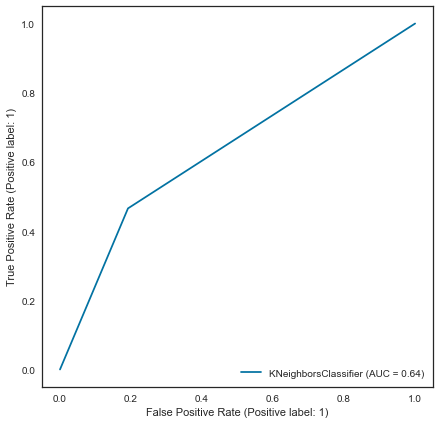

In [ ]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(knn, X_test, y_test, ax = ax)

### TRAIN RESULTS


K-NEAREST NEIGHBOUR (KNN) :
Accuracy: 99.74
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3628
           1       1.00      0.99      0.99      1302

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

Confusion Matrix:


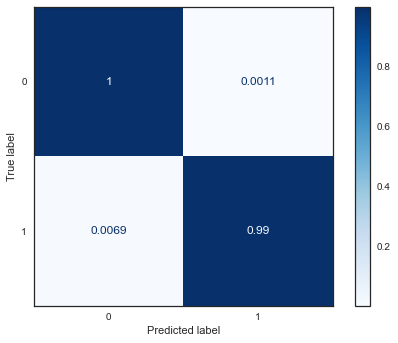

In [ ]:
from sklearn.metrics import plot_confusion_matrix
print('\nK-NEAREST NEIGHBOUR (KNN) :')
predictions = knn.predict(X_train)
knn_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(knn_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(knn,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

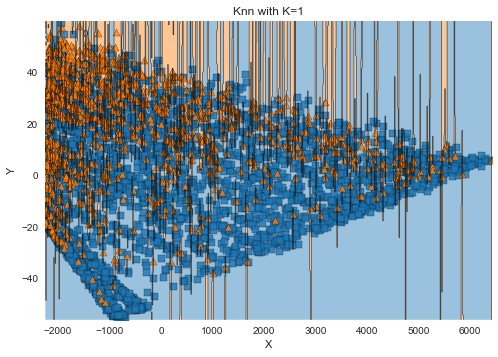

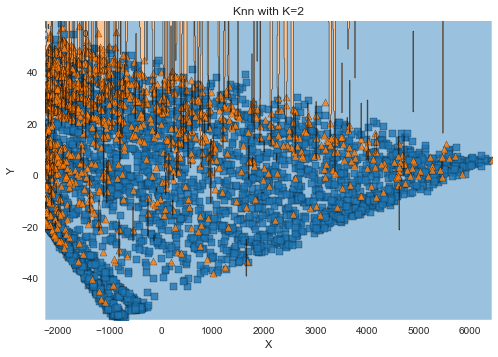

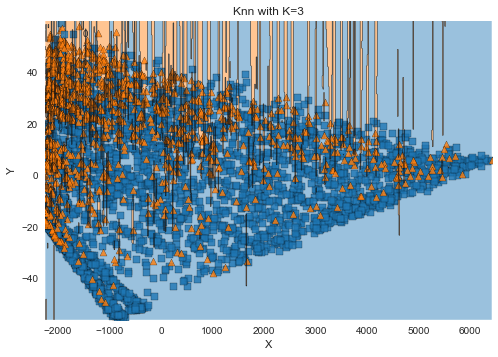

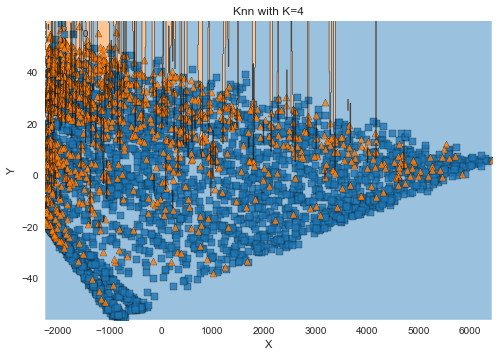

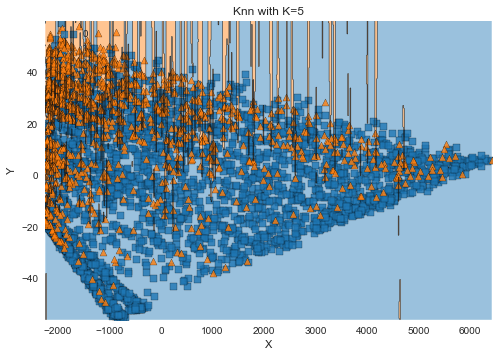

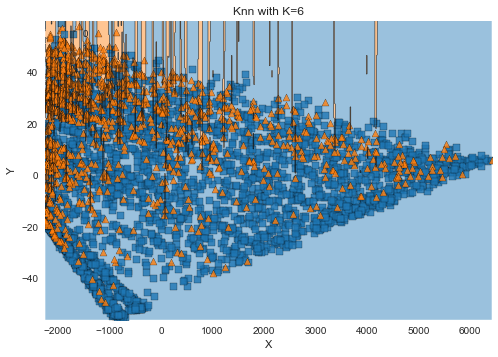

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    pca = PCA(n_components = 2)
    x_train2 = pca.fit_transform(X_train)
    clf.fit(x_train2, y_train)
    # Plotting decision region
    plot_decision_regions(x_train2, y_train.to_numpy(), clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))

    plt.show()

for i in [1,2,3,4,5,6]:
    knn_comparison(i)

### TEST RESULTS


K-NEAREST NEIGHBOUR (KNN) :
Accuracy: 71.65
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1546
           1       0.47      0.47      0.47       567

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113

Confusion Matrix:


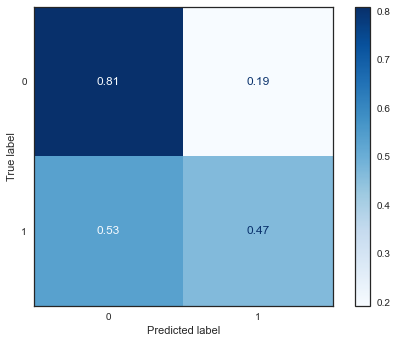

In [ ]:
print('\nK-NEAREST NEIGHBOUR (KNN) :')
predictions = knn.predict(X_test)
knn_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(knn_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(knn,X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

## 3. Decision Tree

In [ ]:
# training and predicting
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:

# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1546
           1       0.68      0.44      0.54       567

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [ ]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1426  120]
 [ 315  252]]


In [ ]:
# performance matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred),2)
f1_score = round(f1_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
y_prob_scores_test = clf.predict_proba(X_test)[:,1]
auc_score = round(roc_auc_score(y_test, y_prob_scores_test),2)

# knn
from astropy.table import Table
dict3 = [{'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall, 'auc_score': auc_score}]
tree_matrix = Table(rows=dict3)
print(tree_matrix)

accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.79     0.54      0.68   0.44      0.82


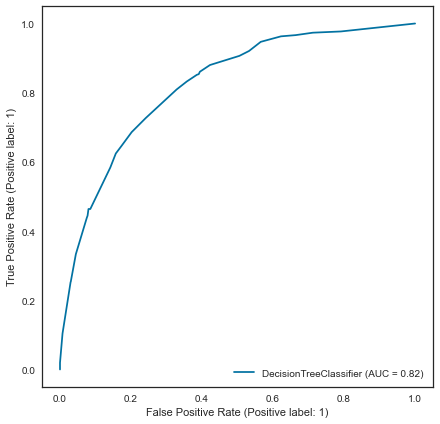

In [ ]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)

In [ ]:
!pip install export_graphviz

ERROR: Could not find a version that satisfies the requirement export_graphviz
ERROR: No matching distribution found for export_graphviz


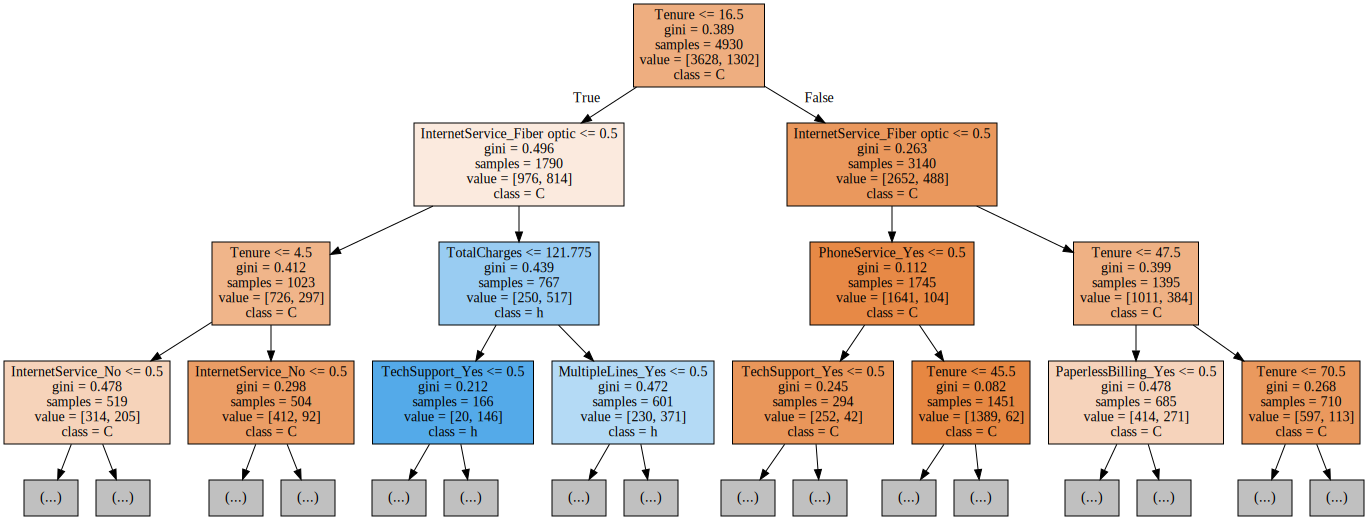

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,
                                class_names='Churn_Yes',
                                filled=True,
                                max_depth=3)

graph = graphviz.Source(dot_data, format="png") 

graph

<AxesSubplot:>

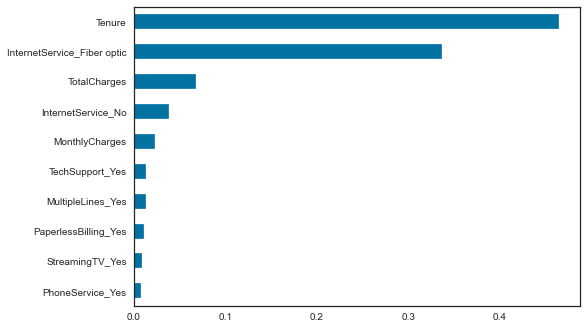

In [ ]:
importances = clf.feature_importances_
weights = pd.Series(importances,index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### TRAIN RESULTS


 DECISION TREE :
Accuracy: 79.00
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3628
           1       0.67      0.47      0.55      1302

    accuracy                           0.80      4930
   macro avg       0.75      0.69      0.71      4930
weighted avg       0.79      0.80      0.79      4930

Confusion Matrix:


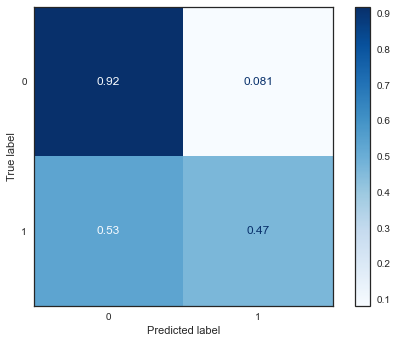

In [ ]:
print('\n DECISION TREE :')
predictions = clf.predict(X_train)
dct_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(clf,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

### TEST RESULTS


 DECISION TREE :
Accuracy: 79.41
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1546
           1       0.68      0.44      0.54       567

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:


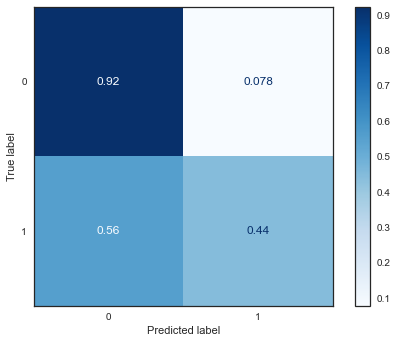

In [ ]:
print('\n DECISION TREE :')
predictions = clf.predict(X_test)
decision_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(decision_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(clf,X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

## 4. Random Forest

In [ ]:
# training and predicting
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.65      0.45      0.53       567

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



In [ ]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1410  136]
 [ 313  254]]


In [ ]:
# performance matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score, roc_auc_score
accuracy = round(accuracy_score(y_test, y_pred),2)
f1_score = round(f1_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
y_prob_scores_test = forest.predict_proba(X_test)[:,1]
auc_score = round(roc_auc_score(y_test, y_prob_scores_test),2)

# knn
from astropy.table import Table
dict4 = [{'accuracy': accuracy, 'f1_score': f1_score, 'precision': precision, 'recall': recall, 'auc_score': auc_score}]
forest_matrix = Table(rows=dict4)
print(tree_matrix)

accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.79     0.54      0.68   0.44      0.82


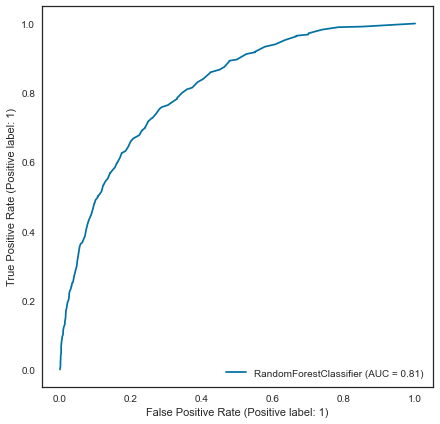

In [ ]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(forest, X_test, y_test, ax = ax)

<AxesSubplot:>

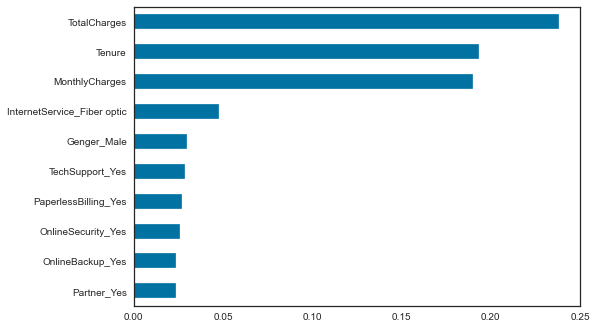

In [ ]:
importances = forest.feature_importances_
weights = pd.Series(importances,index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### TRAIN RESULTS


RANDOM-FOREST
Accuracy: 99.74
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3628
           1       1.00      0.99      0.99      1302

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

Confusion Matrix:


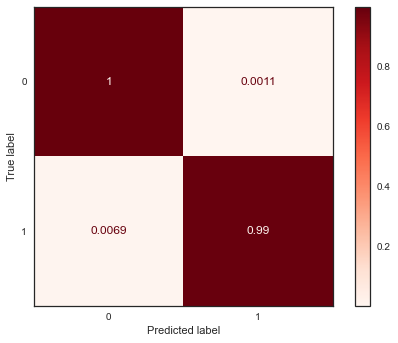

In [ ]:
print('\nRANDOM-FOREST')
predictions = forest.predict(X_train)
random_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(random_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(forest,X_train, y_train, cmap=plt.cm.Reds, normalize='true')
plt.show()


### TEST RESULTS


RANDOM-FOREST
Accuracy: 78.75
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1546
           1       0.65      0.45      0.53       567

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113

Confusion Matrix:


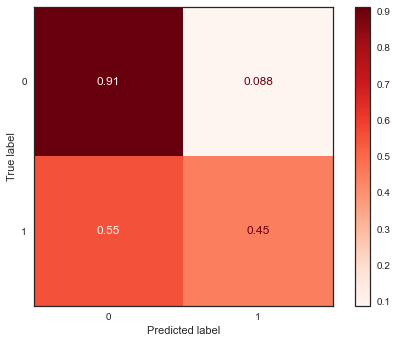

In [ ]:
print('\nRANDOM-FOREST')
predictions = forest.predict(X_test)
random_forest_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(random_forest_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(forest,X_test, y_test, cmap=plt.cm.Reds, normalize='true')
plt.show()

## Gaussian

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [ ]:
acc_gaussian

59.43

### TRAIN RESULTS


 GAUSIIAN : 
Accuracy: 59.43
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.48      0.64      3628
           1       0.39      0.91      0.54      1302

    accuracy                           0.59      4930
   macro avg       0.66      0.70      0.59      4930
weighted avg       0.79      0.59      0.61      4930

Confusion Matrix:


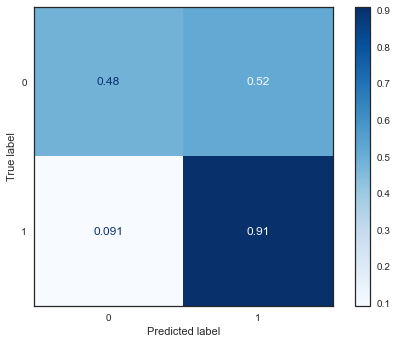

In [ ]:
print('\n GAUSIIAN : ')
predictions = gaussian.predict(X_train)
gauss_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(gauss_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(gaussian,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

### TEST RESULTS


 GAUSIIAN : 
Accuracy: 60.48
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.50      0.65      1546
           1       0.40      0.90      0.55       567

    accuracy                           0.60      2113
   macro avg       0.66      0.70      0.60      2113
weighted avg       0.79      0.60      0.62      2113

Confusion Matrix:


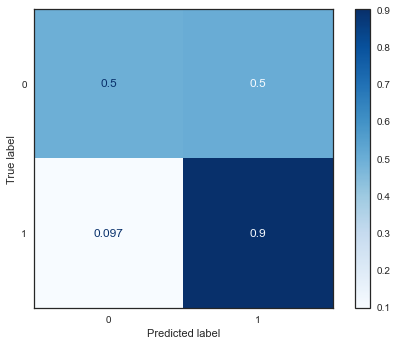

In [ ]:
print('\n GAUSIIAN : ')
predictions = gaussian.predict(X_test)
gauss_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(gauss_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(gaussian,X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

### Naive Bayesian

In [ ]:
# %%Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
accuracy_nb = nb_model.score(X_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.604827259820161


## Perceptron

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [ ]:
acc_perceptron

75.7

### TRAIN RESULTS


PERCEPTRON :
Accuracy: 75.70
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3628
           1       0.55      0.41      0.47      1302

    accuracy                           0.76      4930
   macro avg       0.68      0.65      0.66      4930
weighted avg       0.74      0.76      0.74      4930

Confusion Matrix:


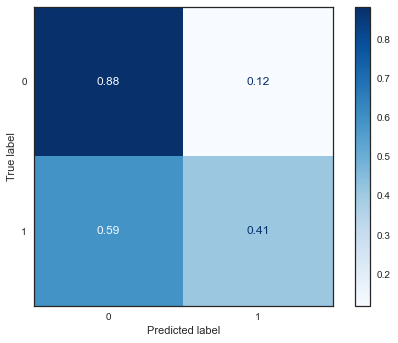

[[3198  430]
 [ 768  534]]


In [ ]:
print('\nPERCEPTRON :')
predictions = perceptron.predict(X_train)
percep_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(percep_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(perceptron,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()
print(sklearn.metrics.confusion_matrix(y_train, predictions))

### TEST RESULTS


PERCEPTRON :
Accuracy: 76.15
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1546
           1       0.58      0.41      0.48       567

    accuracy                           0.76      2113
   macro avg       0.69      0.65      0.66      2113
weighted avg       0.74      0.76      0.75      2113

Confusion Matrix:


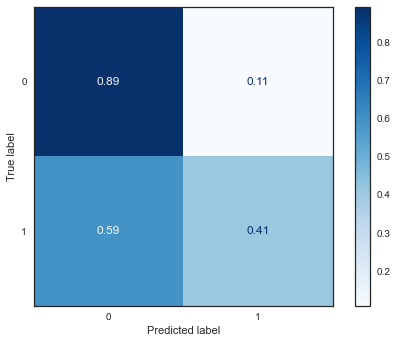

[[1378  168]
 [ 336  231]]


In [ ]:
print('\nPERCEPTRON :')
predictions = perceptron.predict(X_test)
perceptron_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(perceptron_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(perceptron,X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()
print(sklearn.metrics.confusion_matrix(y_test, predictions))

## 5. SVM

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [ ]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(smote_train, smote_target)

SVC(C=1, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= svc.predict(X_test)
svm_test_accuracy= sklearn.metrics.accuracy_score(y_test, y_pred)
print("Accuracy Rate of SVC: {:.2f}".format(svm_test_accuracy))

Accuracy Rate of SVC: 0.79


In [ ]:
from sklearn import metrics
lm.svm = SVC(kernel='linear') 
lm.svm.fit(X_train,y_train)
preds = lm.svm.predict(X_test)
svm_test_accuracy_2= sklearn.metrics.accuracy_score(y_test, preds)
print("Accuracy Rate of SVC: {:.2f}".format(svm_test_accuracy_2))

Accuracy Rate of SVC: 0.80


In [ ]:
pred_train = lm.svm.predict(X_train)
svm_train_accuracy= sklearn.metrics.accuracy_score(y_train, pred_train)
print("Accuracy Rate of SVC: {:.2f}".format(svm_train_accuracy))

Accuracy Rate of SVC: 0.79


In [ ]:

svm2 = SVC(kernel='poly') 
svm2.fit(X_train,y_train)
preds2 = svm2.predict(X_test)
metrics.accuracy_score(y_test, preds2)

0.7316611452910554

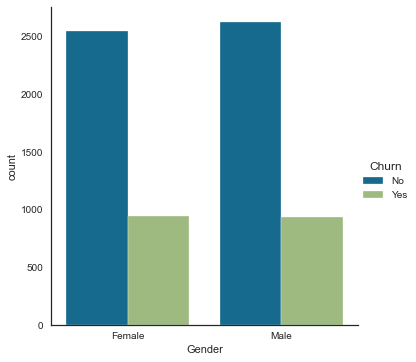

In [ ]:
ax1 = sns.catplot(x="Gender", kind="count", hue="Churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

In [ ]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  
print(classification_report(y_test,preds))

[[1447   99]
 [ 316  251]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1546
           1       0.72      0.44      0.55       567

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



## Linear Support Vector Machine

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

In [ ]:
acc_linear_svc

77.38

### TRAIN RESULTS


 Linear Support Vector Machine :
Accuracy: 77.38
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3628
           1       0.56      0.66      0.61      1302

    accuracy                           0.77      4930
   macro avg       0.72      0.74      0.72      4930
weighted avg       0.79      0.77      0.78      4930

Confusion Matrix:


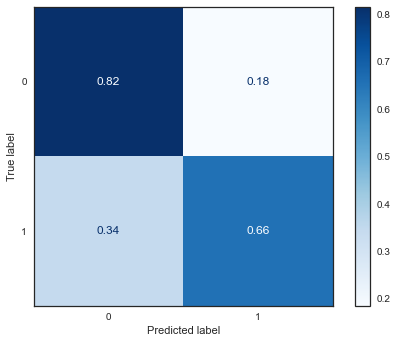

In [ ]:
print('\n Linear Support Vector Machine :')
predictions = linear_svc.predict(X_train)
linear_support_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(linear_support_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

### TEST RESULTS


 Linear Support Vector Machine :
Accuracy: 77.95
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1546
           1       0.58      0.63      0.61       567

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.78      2113

Confusion Matrix:


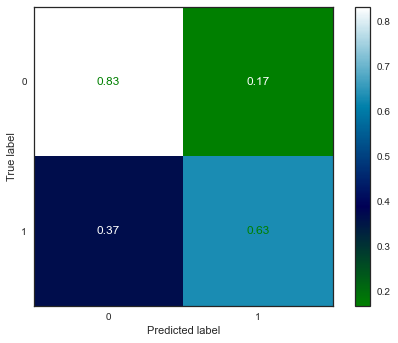

In [ ]:
print('\n Linear Support Vector Machine :')
predictions = linear_svc.predict(X_test)
linear_support_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(linear_support_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,X_test, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

## SVM With Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=4,scoring="accuracy", cv=10)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)


In [ ]:

grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1546
           1       0.67      0.37      0.48       567

    accuracy                           0.78      2113
   macro avg       0.73      0.65      0.67      2113
weighted avg       0.77      0.78      0.76      2113



In [ ]:
print('-----')
print(f'Best parameters {grid.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: {grid.best_score_:.3f}')
print('-----')

svm_best=grid.best_score_*100
svm_best

-----
Best parameters {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Mean cross-validated accuracy score of the best_estimator: 0.779
-----


77.93103448275863

## LSVM Hyperparameter Tuning

In [ ]:
"""from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid_lsvm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid_lsvm = GridSearchCV(LinearSVC(), param_grid_lsvm, refit = True, verbose = 3,n_jobs=4,scoring="accuracy", cv=10)
  
# fitting the model for grid search
grid_lsvm.fit(X_train, y_train)"""

'from sklearn.model_selection import GridSearchCV\n  \n# defining parameter range\nparam_grid_lsvm = {\'C\': [0.1, 1, 10, 100, 1000], \n              \'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\n              \'kernel\': [\'linear\']} \n  \ngrid_lsvm = GridSearchCV(LinearSVC(), param_grid_lsvm, refit = True, verbose = 3,n_jobs=4,scoring="accuracy", cv=10)\n  \n# fitting the model for grid search\ngrid_lsvm.fit(X_train, y_train)'

## ADA Boost

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ada.fit(X_train,y_train)


AdaBoostClassifier()

### TRAIN RESULTS

In [ ]:
ada_pred = ada.predict(X_train)
ada_train_accuracy= sklearn.metrics.accuracy_score(y_train, ada_pred)

Accuracy: 80.63
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3628
           1       0.67      0.52      0.59      1302

    accuracy                           0.81      4930
   macro avg       0.76      0.71      0.73      4930
weighted avg       0.80      0.81      0.80      4930

Confusion Matrix:


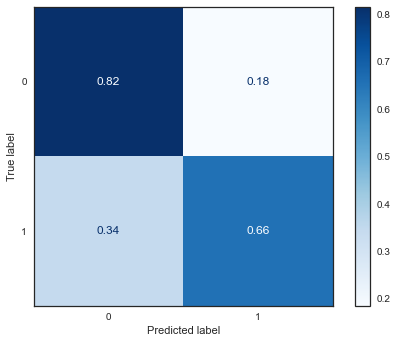

In [ ]:
print('Accuracy: {0:.2f}'.format(ada_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, ada_pred))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

### TEST RESULTS

In [ ]:
ad_preds = ada.predict(X_test)
ada_test_accuracy= sklearn.metrics.accuracy_score(y_test, ad_preds)

Accuracy: 80.27
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1546
           1       0.68      0.51      0.58       567

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Confusion Matrix:


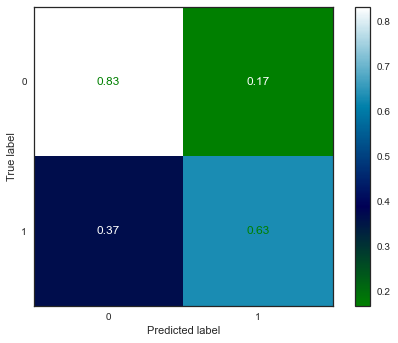

In [ ]:
print('Accuracy: {0:.2f}'.format(ada_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, ad_preds))
print('Confusion Matrix:')
plot_confusion_matrix(linear_svc,X_test, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

## ADABoost Hyperparameter Tuning

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=123, max_depth=2),
    random_state = 123)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[10, 100, 200, 250],
              "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 3)
grid_ada_clf.fit(X_train, y_train)
grid_ada_clf.best_params_

ada_pred = grid_ada_clf.predict(X_test).astype(int)
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, y_test))/2
grid_ada_scores

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


0.8023392329335736

In [ ]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=4,cv=10)

In [ ]:
search.fit(X_train,y_train)
search.best_params_
search.best_score_


0.798580121703854

## XG Boost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier()
xgb.fit(X_train_minmax, y_train)
preds = xgb.predict(X_test_minmax)
metrics.accuracy_score(y_test, preds)

[15:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7851396119261713

### TRAIN RESULTS

In [ ]:
import sklearn


 XGBOOST :
Accuracy: 94.04
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3628
           1       0.93      0.84      0.88      1302

    accuracy                           0.94      4930
   macro avg       0.94      0.91      0.92      4930
weighted avg       0.94      0.94      0.94      4930

Confusion Matrix:


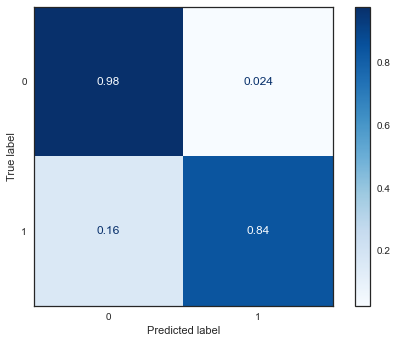

In [ ]:
print('\n XGBOOST :')
predictions = xgb.predict(X_train_minmax)
xgb_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(xgb_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_train_minmax, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()

### TEST RESULTS


 Linear Support Vector Machine :
Accuracy: 78.51
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1546
           1       0.63      0.48      0.54       567

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.77      2113

Confusion Matrix:


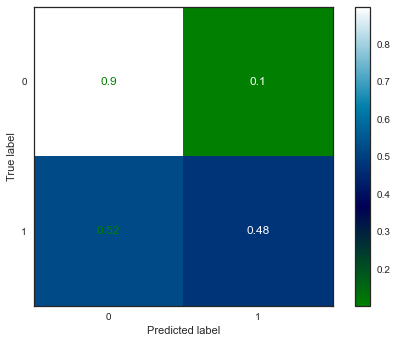

In [ ]:
print('\n Linear Support Vector Machine :')
predictions = xgb.predict(X_test_minmax)
xgboost_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(xgboost_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_test_minmax, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

## Which is the Best Training Model ?

In [ ]:
results = pd.DataFrame({
    'Train Score': [svm_train_accuracy*100, knn_train_accuracy*100, log_train_accuracy*100, 
              random_train_accuracy*100, gauss_train_accuracy*100, percep_train_accuracy*100, xgb_train_accuracy*100,
              acc_sgd, dct_train_accuracy*100, linear_support_train_accuracy*100,ada_train_accuracy*100],

     'Test Score': [svm_test_accuracy_2*100, knn_test_accuracy*100, log_reg_test_accuracy*100, 
              random_forest_test_accuracy*100, gauss_test_accuracy*100, perceptron_test_accuracy*100, xgboost_test_accuracy*100,
              acc_sgd_test, decision_test_accuracy*100, linear_support_test_accuracy*100,ada_test_accuracy*100] ,        
     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST',
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Linear Support Vector Machine', 'ADABoost']})
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Train Score')
result_df

,Test Score,Model
Train Score,,
99.736308,71.651680,KNN
99.736308,78.750592,Random Forest
94.036511,78.513961,XGBOOST
80.628803,80.265026,ADABoost
79.898580,79.413157,Decision Tree
79.229209,80.359678,Support Vector Machines
77.383367,77.946048,Linear Support Vector Machine
75.699797,76.147657,Perceptron
75.600000,76.380000,Stochastic Gradient Decent


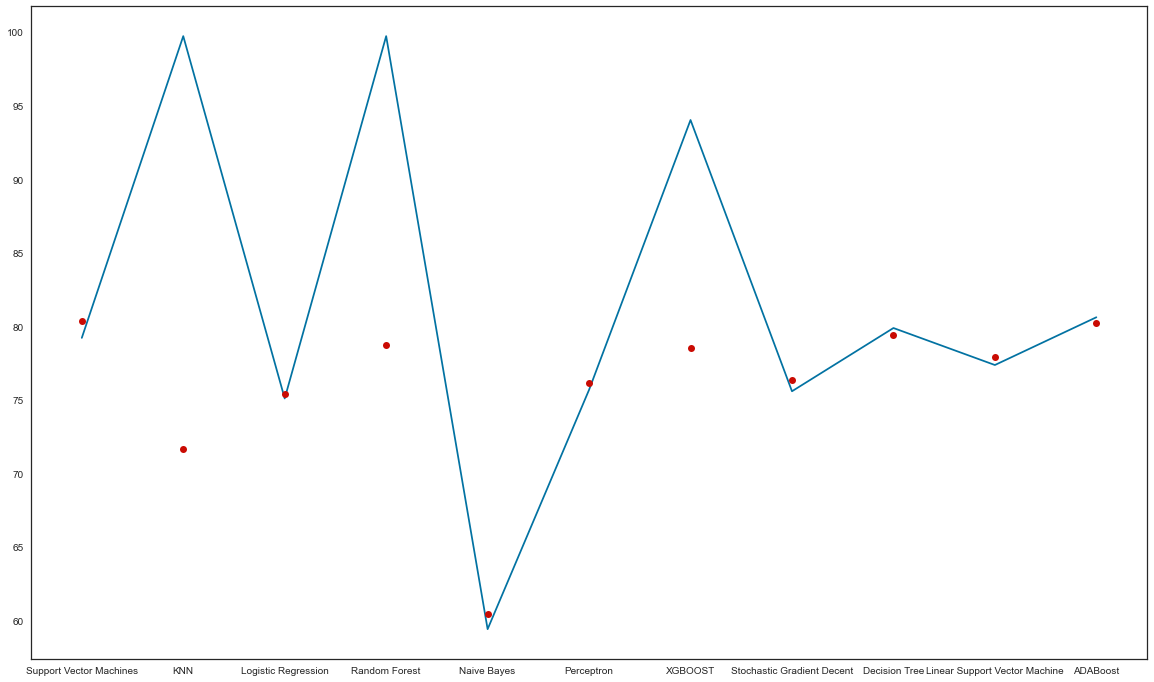

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 12))
plt.plot(['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST',
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Linear Support Vector Machine', 'ADABoost'],
         [svm_train_accuracy*100, knn_train_accuracy*100, log_train_accuracy*100, 
              random_train_accuracy*100, gauss_train_accuracy*100, percep_train_accuracy*100, xgb_train_accuracy*100,
              acc_sgd, dct_train_accuracy*100, linear_support_train_accuracy*100,ada_train_accuracy*100],
         [svm_test_accuracy_2*100, knn_test_accuracy*100, log_reg_test_accuracy*100, 
              random_forest_test_accuracy*100, gauss_test_accuracy*100, perceptron_test_accuracy*100, xgboost_test_accuracy*100,
              acc_sgd_test, decision_test_accuracy*100, linear_support_test_accuracy*100,ada_test_accuracy*100], 'ro')

plt.show()

## DCT Hyperparameter Tuning

In [ ]:
import random
import os
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    

SEED = 42
set_seed(SEED)

In [ ]:
parameters = {
  "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=SEED,
    class_weight='balanced',
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: {model_desicion_tree.best_score_:.3f}')
print('-----')

acc_decision=model_desicion_tree.best_score_*100
acc_decision

-----
Best parameters {'max_depth': 7}
Mean cross-validated accuracy score of the best_estimator: 0.730
-----


73.00202839756594

## RDF Hyperparameter Tuning

In [ ]:
K_fold = StratifiedKFold(n_splits=10)
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

gsFRC_random= gsRFC.best_score_*100
gsFRC_random

Fitting 10 folds for each of 36 candidates, totalling 360 fits


79.71602434077079

## KNN Hyperparameter Tuning

In [ ]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
grid_knn_clf = GridSearchCV(knn, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_knn_clf.fit(X_train_minmax, y_train)
grid_knn_clf.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'n_neighbors': 4, 'weights': 'uniform'}

In [ ]:
skfold = StratifiedKFold(n_splits=5)
grid_knn_cross_scores = cross_val_score(grid_knn_clf, X_train_minmax, y_train, cv=skfold, scoring="accuracy")
grid_knn_pred = grid_knn_clf.predict(X_test_minmax).astype(int)
grid_knn_scores = (grid_knn_cross_scores.mean() + accuracy_score (grid_knn_pred, y_test))/2 
grid_knn_scores
knn_best= grid_knn_scores*100
knn_best

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


76.51870147997185

## XGBoost Hyperparameter Tuning

In [ ]:
#import tensorflow as tf
#tf.test.gpu_device_name()

In [ ]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [ ]:
#!cat /proc/meminfo

In [ ]:
#!cat /proc/cpuinfo

In [ ]:
#!pip install xgboost


In [ ]:
#import numpy as np
#import tensorflow as tf

In [ ]:
#!pip install -U setuptools

In [ ]:
!nvidia-smi

Sat May  8 15:18:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.56       Driver Version: 461.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   67C    P8    10W /  N/A |    153MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#import subprocess
#print(subprocess.getoutput('nvidia-smi'))

In [ ]:
#!pip install gputil
#!pip install psutil
#!pip install humanize

In [ ]:
# Import packages
#import os,sys,humanize,psutil,GPUtil

# Define function
#def mem_report():
#  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
#  GPUs = GPUtil.getGPUs()
#  for i, gpu in enumerate(GPUs):
#    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
#mem_report()

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    tree_method='gpu_hist', gpu_id=0
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train_minmax, y_train)
#grid_search.best_estimator_
xgboost_best= grid_search.best_score_*100
xgboost_best

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[15:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


83.85943483339398

# VII. Conclusion

In [ ]:
results = pd.DataFrame({
    'Test Score':[svm_test_accuracy_2*100, knn_test_accuracy*100, log_reg_test_accuracy*100, 
              random_forest_test_accuracy*100, gauss_test_accuracy*100, perceptron_test_accuracy*100, xgboost_test_accuracy*100,
              acc_sgd_test, decision_test_accuracy*100, linear_support_test_accuracy*100,ada_test_accuracy*100],
    
    
    'Train Score': [svm_best, knn_best, logic_score*100, gsFRC_random ,gauss_train_accuracy*100, percep_train_accuracy*100, xgboost_best,
              acc_sgd,acc_decision,linear_support_train_accuracy*100, grid_ada_scores*100],
    
     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST', 'SGD',
              'Decision Tree', 'Linear Support Vector Machine','ADABoost'],


})
result_df = results.sort_values(by='Train Score', ascending=False)
result_df = result_df.set_index('Train Score')
result_df

,Test Score,Model
Train Score,,
83.859435,78.513961,XGBOOST
80.233923,80.265026,ADABoost
79.817444,75.390440,Logistic Regression
79.716024,78.750592,Random Forest
77.931034,80.359678,Support Vector Machines
77.383367,77.946048,Linear Support Vector Machine
76.518701,71.651680,KNN
75.699797,76.147657,Perceptron
75.600000,76.380000,SGD


When we look at the table, we can see XGBoost as the best performing model.

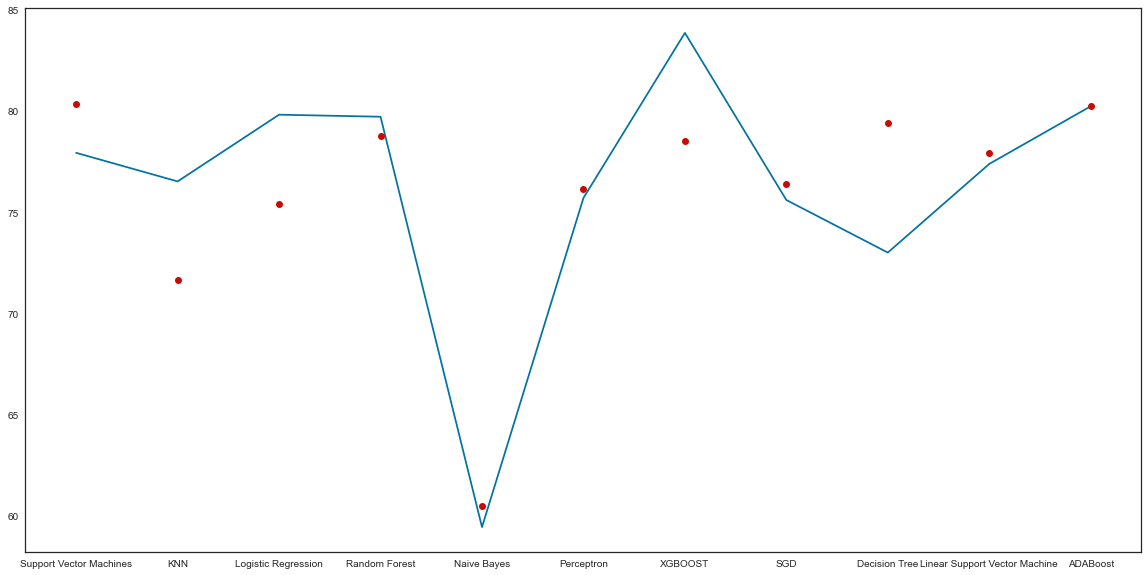

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGBOOST', 'SGD',
              'Decision Tree', 'Linear Support Vector Machine','ADABoost'], 
         [svm_best, knn_best, logic_score*100,gsFRC_random ,gauss_train_accuracy*100, percep_train_accuracy*100, xgboost_best,
              acc_sgd,acc_decision,linear_support_train_accuracy*100, grid_ada_scores*100],
         [svm_test_accuracy_2*100, knn_test_accuracy*100, log_reg_test_accuracy*100, 
              random_forest_test_accuracy*100, gauss_test_accuracy*100, perceptron_test_accuracy*100, xgboost_test_accuracy*100,
              acc_sgd_test, decision_test_accuracy*100, linear_support_test_accuracy*100,ada_test_accuracy*100], 'ro')

plt.show()


Based on the performance metrics below, the best model is Logistic Regression with F1-score of 62% and auc score of 0.84.

In [ ]:
print('logistic regression')
print(logis_matrix)
print('knn')
print(knn_matrix)
print('decision tree')
print(tree_matrix)
print('random forest')
print(forest_matrix)

logistic regression
accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.75     0.62      0.53   0.75      0.84
knn
accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.72     0.47      0.47   0.47      0.64
decision tree
accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.79     0.54      0.68   0.44      0.82
random forest
accuracy f1_score precision recall auc_score
-------- -------- --------- ------ ---------
    0.79     0.53      0.65   0.45      0.81
